In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [3]:
import os
import glob

from pandas.api.types import CategoricalDtype

HOME = "/home/kwatchar3/spauq-home/spauq/expt/codec/musdb/results-2s/mp3"

results = glob.glob(os.path.join(HOME, "*.csv"))

dfs = []

for r in results:
    model_name = r.split("/")[-1].replace(".csv", "")
    # print(model_name)
    codec, bitrate, mode = model_name.split("-")
    df = pd.read_csv(r).rename(columns={'Unnamed: 0': 'title', 'Unnamed: 1': 'instrument'})
    df['codec'] = codec
    df['bitrate'] = int(bitrate)
    df['mode'] = mode
    df['mode'] = df['mode'].apply(
        lambda x: {
            's': 'forced L/R',
            'j': 'joint',
            'f': 'forced M/S',
        }[x]
    )
    dfs.append(df)
    
df = pd.concat(dfs).reset_index().drop(columns='index').sort_values(['bitrate', 'mode'])

df

,title,instrument,SSR,SRR,cost,shift,scale,codec,bitrate,mode
1800,AM Contra - Heart Peripheral,mixture,-2.280685,10.617110,12.319217,"[[-576.0, -576.0], [-576.0, -576.0]]","[[0.8201588099828756, 0.07300216959860413], [0...",mp3,32,forced L/R
1801,Al James - Schoolboy Facination,mixture,-2.275620,7.466713,16.209001,"[[-576.0, -576.0], [-576.0, -576.0]]","[[0.8356371067176238, 0.02314196496385838], [0...",mp3,32,forced L/R
1802,Angels In Amplifiers - I'm Alright,mixture,-2.412500,9.813426,14.646187,"[[-576.0, -576.0], [-576.0, -576.0]]","[[0.8942603805887558, 0.005520560528816521], [...",mp3,32,forced L/R
1803,Arise - Run Run Run,mixture,-3.205762,17.856302,7.794503,"[[-576.0, -576.0], [-576.0, -576.0]]","[[0.9330038881496325, 0.009078247937057022], [...",mp3,32,forced L/R
1804,BKS - Bulldozer,mixture,-2.434159,11.654510,10.669433,"[[-576.0, -576.0], [-576.0, -576.0]]","[[0.8959912048889455, 0.03055858532896886], [0...",mp3,32,forced L/R
...,...,...,...,...,...,...,...,...,...,...
1795,Timboz - Pony,mixture,70.694042,33.367932,1.078558,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9997470090014248, 9.223325146539768e-05], ...",mp3,320,joint
1796,Tom McKenzie - Directions,mixture,67.376048,35.940200,0.809923,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9993944549408778, 0.00041519543389567935],...",mp3,320,joint
1797,Triviul feat. The Fiend - Widow,mixture,62.259235,30.523303,1.311979,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9991277096526218, 0.00010661125805176935],...",mp3,320,joint
1798,We Fell From The Sky - Not You,mixture,72.147263,36.210024,0.747052,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9997902904157169, 9.591352611717953e-05], ...",mp3,320,joint


<Axes: >

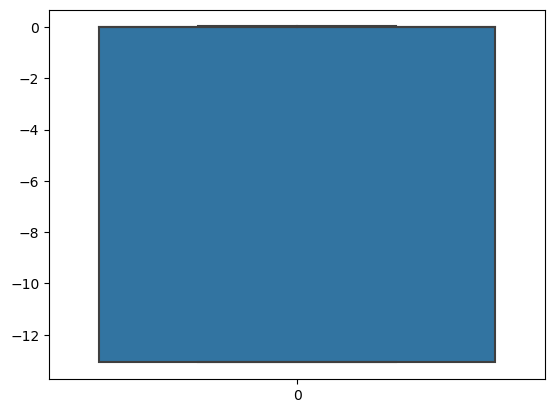

In [6]:
import json

sns.boxplot(df['shift'].apply(json.loads).apply(np.array).apply(lambda x: 1000*x[0,1]/44100), showfliers=True)

In [163]:
def plot(brrange=[0, np.inf], ssr_step=25, srr_step=10):
    sns.set("paper", "darkgrid", "colorblind", font_scale=1.5)
    
    bf = (df['bitrate'] >= brrange[0]) & (df['bitrate'] <= brrange[1]) 

    f, ax = plt.subplots(2, 1, figsize=(8, 4), tight_layout=True, dpi=300)
    kwargs = dict(showfliers=True, notch=True, fliersize=1, flierprops={"marker": "x"}, width=0.9)
    sns.boxplot(df[bf], y='SSR', hue='mode', x='bitrate', ax=ax[0], **kwargs)
    sns.boxplot(df[bf], y='SRR', hue='mode', x='bitrate', ax=ax[1], **kwargs)
    
    
    ssr_min, ssr_max = df[bf]['SSR'].quantile(0.02), df[bf]['SSR'].max()
    ssr_min, ssr_max = np.floor(ssr_min/ssr_step)*ssr_step, np.ceil(ssr_max/ssr_step)*ssr_step
    ssr_minor_step = 1 if ssr_step <= 5 else 5
    
    srr_min, srr_max = df[bf]['SRR'].quantile(0.02), df[bf]['SRR'].max()
    srr_min, srr_max = np.floor(srr_min/srr_step)*srr_step, np.ceil(srr_max/srr_step)*srr_step
    srr_minor_step = 1 if srr_step <= 5 else 5

    ax[0].set_yticks(np.arange(ssr_min, ssr_max+1, ssr_step))
    ax[0].set_yticks(np.arange(ssr_min, ssr_max, ssr_minor_step), minor=True)
    ax[1].set_yticks(np.arange(srr_min, srr_max+1, srr_step))
    ax[1].set_yticks(np.arange(srr_min, srr_max, srr_minor_step), minor=True)
    ax[0].set(ylim=[ssr_min, ssr_max])
    ax[1].set(ylim=[srr_min, srr_max])
    ax[0].set(ylim=[ssr_min, ssr_max], ylabel='SSR (dB)')
    ax[1].set(ylim=[srr_min, srr_max], ylabel='SRR (dB)')

    for a in ax:
        a.grid(True, axis='y', which='minor')
        a.tick_params(axis='both', which='minor')
        a.set(xlabel=None)
        a.legend().remove()

    plt.tight_layout()
    f.align_ylabels(ax)
    plt.xlabel('constant bitrate (Kbps)')
    f.subplots_adjust(wspace=0, hspace=0.25)

    h, l = ax[0].get_legend_handles_labels()
    f.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.55, 1.05))#, fontsize=10)


    ax[1].set(xticklabels=[])
    
    return ax


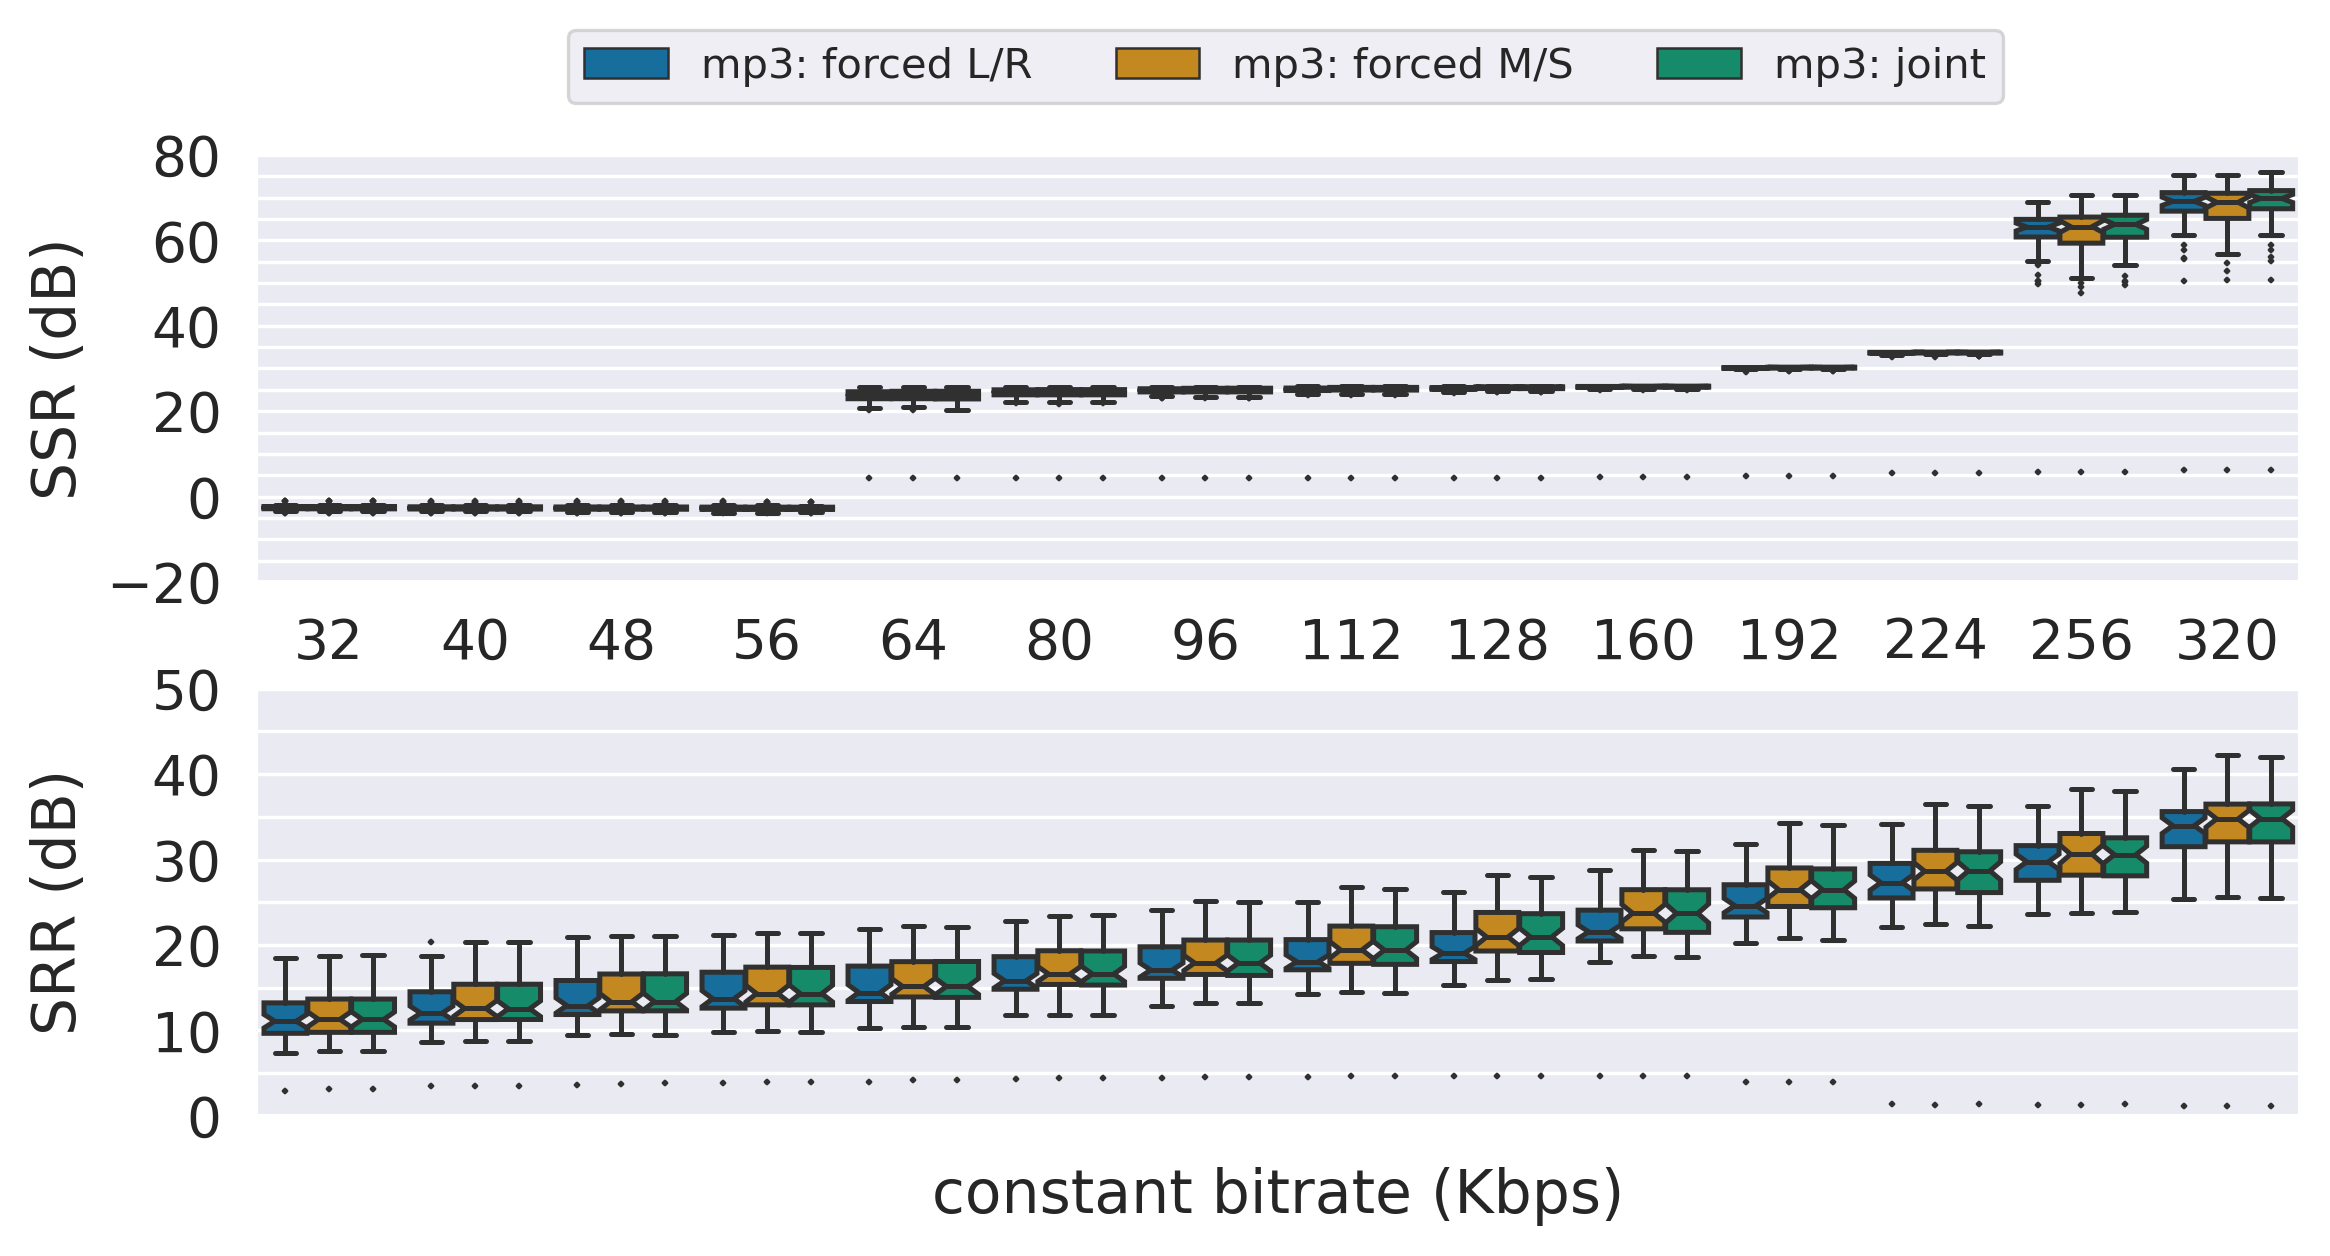

In [164]:
plot(ssr_step=20)

plt.savefig("mp3-musdb.png", bbox_inches='tight')
plt.show()

In [ ]:
plot([32, 56], ssr_step=1, srr_step=5)

In [ ]:
ax = plot([112, 128], ssr_step=5, srr_step=10)
ax[0].set(ylim=[22, 27])

In [ ]:
plot([160, 320], 5)